In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [6]:
df = df.drop_duplicates()

In [7]:
df["Class"].value_counts() 

Class
0    283253
1       473
Name: count, dtype: int64

In [8]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


In [9]:
df.groupby("Class")["Time"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,94835.058093,47475.550607,0.0,54233.0,84711.0,139308.0,172792.0
1,473.0,80450.513742,48636.179973,406.0,41203.0,73408.0,129095.0,170348.0


In [10]:
df.Amount.describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
target = df[["Class"]]
feature = df.drop("Class",axis = 1)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,stratify=target)

In [13]:
print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))


Train distribution:
Class
0        0.998335
1        0.001665
Name: proportion, dtype: float64

Test distribution:
Class
0        0.998326
1        0.001674
Name: proportion, dtype: float64


In [14]:
scaler = StandardScaler()

x_train[["Time","Amount"]] = scaler.fit_transform(x_train[["Time","Amount"]] )
x_test[["Time","Amount"]] = scaler.transform(x_test[["Time","Amount"]] )

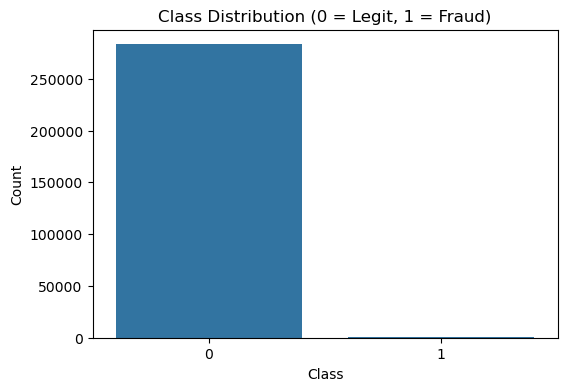

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [16]:
smote = SMOTE(sampling_strategy=0.05,random_state=42)

x_train_new , y_train_new  = smote.fit_resample(x_train, y_train)

In [17]:
y_train_new["Class"].value_counts()

Class
0    226602
1     11330
Name: count, dtype: int64

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_new,y_train_new)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.64      0.77      0.70        95

    accuracy                           1.00     56746
   macro avg       0.82      0.88      0.85     56746
weighted avg       1.00      1.00      1.00     56746



In [20]:
import pickle

with open("fraud_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
